# Quiz 03
## ITCR - Escuela de Computación
### Procesamiento de Lenguaje Natural (NLP) con Aprendizaje Automático

### Extracción de características en textos

### Estudiante: Ricardo Chacon

### 1. Seleccione un conjunto de datos para realizar la clasificación de textos (puntos extra si el conjunto de datos está escrito en español).

Se optó por el data set de Twitter Sentiment Analysis por su adecuación precisa a los objetivos del ejercicio.

Fuente: https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis




### 2. . Describa el problema, el objetivo del ejercicio y los datos a utilizar

Problema: El problema es realizar un análisis de sentimientos en tweets relacionados con un tema específico.

Objetivo del ejercicio: El objetivo es determinar la polaridad de las opiniones expresadas en los tweets, es decir, clasificarlos en positivos, negativos o neutrales, para comprender la percepción del público sobre el tema en cuestión.

Datos a utilizar: Se utilizará un data set de Twitter Sentiment Analysis que contiene tweets etiquetados con su respectiva polaridad (positiva, negativa o neutral). Cada tweet será el punto de partida para realizar el análisis de sentimientos y obtener información sobre cómo se siente la comunidad en relación con el tema analizado.


### 3. Preprocese el conjunto de datos, es decir:
    1. Verifique si existen registros con valores faltantes y de ser así elimínelos.
    2. Utilice expresiones regulares para eliminar los caracteres especiales.
    3. Elimine las "stop words".
    4. Convierta el texto del campo a clasificar a minúsculas


In [5]:
# Importar Datos

import pandas as pd
#Datos de entrenamiento
file_path = r'C:\Users\chaconri\Desktop\Data Science TEC\twitter_training.csv'

trainingtw = pd.read_csv(file_path)

#Datos de Validacion
file_path = r'C:\Users\chaconri\Desktop\Data Science TEC\twitter_validation.csv'

validationtw = pd.read_csv(file_path)

#Imprimir Datos
trainingtw.head()



,Tweet ID,Entity,Sentiment,Tweet Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [6]:
validationtw.head()

,Tweet ID,Entity,Sentiment,Tweet Content
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


### 1. Verifique si existen registros con valores faltantes y de ser así elimínelos.

In [9]:
# Verificar si existen registros con valores faltantes
print(trainingtw.isnull().sum())
# Eliminar registros con valores faltantes
trainingtw = trainingtw.dropna()
# Verificar nuevamente si existen registros con valores faltantes (opcional)
print(trainingtw.isnull().sum())

Tweet ID         0
Entity           0
Sentiment        0
Tweet Content    0
dtype: int64
Tweet ID         0
Entity           0
Sentiment        0
Tweet Content    0
dtype: int64


In [10]:
# Verificar si existen registros con valores faltantes
print(validationtw.isnull().sum())
# Eliminar registros con valores faltantes
trainingtw = trainingtw.dropna()
# Verificar nuevamente si existen registros con valores faltantes (opcional)
print(validationtw.isnull().sum())

Tweet ID         0
Entity           0
Sentiment        0
Tweet Content    0
dtype: int64
Tweet ID         0
Entity           0
Sentiment        0
Tweet Content    0
dtype: int64


### 2. Utilice expresiones regulares para eliminar los caracteres especiales.

In [13]:
import re

# Función para eliminar caracteres especiales utilizando expresiones regulares
def remove_special_characters(text):
    # Utilizamos la expresión regular para eliminar caracteres no alfanuméricos
    return re.sub(r'[^a-zA-Z0-9\s]', '', text)

# Aplicar la función 'remove_special_characters' a la columna que contiene los textos
trainingtw['Tweet Content'] = trainingtw['Tweet Content'].apply(remove_special_characters)

# Verificar el DataFrame modificado
trainingtw.head()


,Tweet ID,Entity,Sentiment,Tweet Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you all
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [14]:
import re

# Función para eliminar caracteres especiales utilizando expresiones regulares
def remove_special_characters(text):
    # Utilizamos la expresión regular para eliminar caracteres no alfanuméricos
    return re.sub(r'[^a-zA-Z0-9\s]', '', text)

# Aplicar la función 'remove_special_characters' a la columna que contiene los textos
validationtw['Tweet Content'] = validationtw['Tweet Content'].apply(remove_special_characters)

# Verificar el DataFrame modificado
validationtw.head()

,Tweet ID,Entity,Sentiment,Tweet Content
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News Amazon boss Jeff Bezos rejects claim...
2,8312,Microsoft,Negative,Microsoft Why do I pay for WORD when it functi...
3,4371,CS-GO,Negative,CSGO matchmaking is so full of closet hacking ...
4,4433,Google,Neutral,Now the President is slapping Americans in the...


### 3. Elimine las "stop words".

In [21]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

# Función para eliminar stop words en inglés
def remove_stop_words(text):
    stop_words = set(stopwords.words('english'))
    # Tokenizar el texto en palabras
    words = text.split()
    # Eliminar stop words y unir las palabras nuevamente
    return " ".join([word for word in words if word.lower() not in stop_words])

# Aplicar la función 'remove_stop_words' a la columna que contiene los textos
trainingtw['Tweet Content'] = trainingtw['Tweet Content'].apply(remove_stop_words)

# Verificar el DataFrame modificado
trainingtw.head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chaconri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Tweet ID,Entity,Sentiment,Tweet Content
0,2401,Borderlands,Positive,im getting borderlands murder
1,2401,Borderlands,Positive,coming borders kill
2,2401,Borderlands,Positive,im getting borderlands kill
3,2401,Borderlands,Positive,im coming borderlands murder
4,2401,Borderlands,Positive,im getting borderlands 2 murder


In [23]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

# Función para eliminar stop words en inglés
def remove_stop_words(text):
    stop_words = set(stopwords.words('english'))
    # Tokenizar el texto en palabras
    words = text.split()
    # Eliminar stop words y unir las palabras nuevamente
    return " ".join([word for word in words if word.lower() not in stop_words])

# Aplicar la función 'remove_stop_words' a la columna que contiene los textos
validationtw['Tweet Content'] = validationtw['Tweet Content'].apply(remove_stop_words)

# Verificar el DataFrame modificado
validationtw.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chaconri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Tweet ID,Entity,Sentiment,Tweet Content
0,3364,Facebook,Irrelevant,mentioned Facebook struggling motivation go ru...
1,352,Amazon,Neutral,BBC News Amazon boss Jeff Bezos rejects claims...
2,8312,Microsoft,Negative,Microsoft pay WORD functions poorly SamsungUS ...
3,4371,CS-GO,Negative,CSGO matchmaking full closet hacking truly awf...
4,4433,Google,Neutral,President slapping Americans face really commi...


### 4. Convierta el texto del campo a clasificar a minúsculas

In [25]:
# Convertir el texto del campo 'Tweet Content' a minúsculas
trainingtw['Tweet Content'] = trainingtw['Tweet Content'].str.lower()

# Verificar el DataFrame modificado
trainingtw.head()

,Tweet ID,Entity,Sentiment,Tweet Content
0,2401,Borderlands,Positive,im getting borderlands murder
1,2401,Borderlands,Positive,coming borders kill
2,2401,Borderlands,Positive,im getting borderlands kill
3,2401,Borderlands,Positive,im coming borderlands murder
4,2401,Borderlands,Positive,im getting borderlands 2 murder


In [26]:
# Convertir el texto del campo 'Tweet Content' a minúsculas
validationtw['Tweet Content'] = validationtw['Tweet Content'].str.lower()

# Verificar el DataFrame modificado
validationtw.head()

,Tweet ID,Entity,Sentiment,Tweet Content
0,3364,Facebook,Irrelevant,mentioned facebook struggling motivation go ru...
1,352,Amazon,Neutral,bbc news amazon boss jeff bezos rejects claims...
2,8312,Microsoft,Negative,microsoft pay word functions poorly samsungus ...
3,4371,CS-GO,Negative,csgo matchmaking full closet hacking truly awf...
4,4433,Google,Neutral,president slapping americans face really commi...


### Explore y visualice algunas estadísticas con gráficos de barras o pastel. Por ejemplo, cuente cuántos registros hay en cada clase y haga un histograma con el largo de los textos.

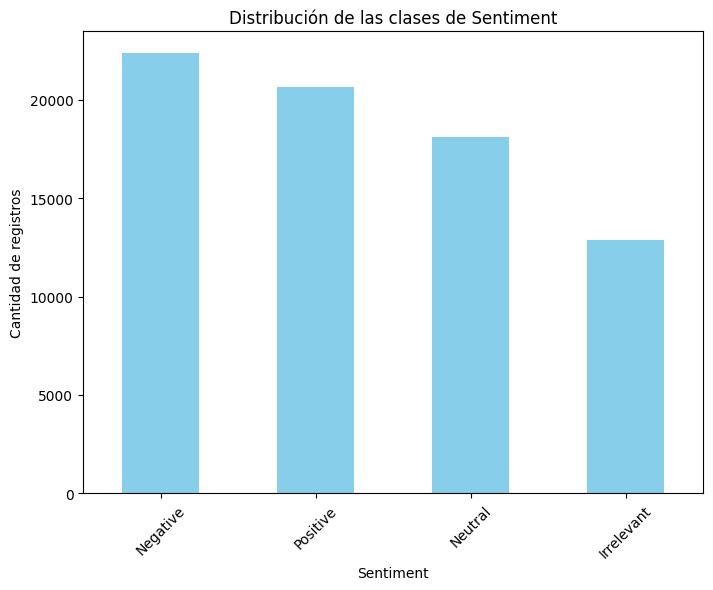

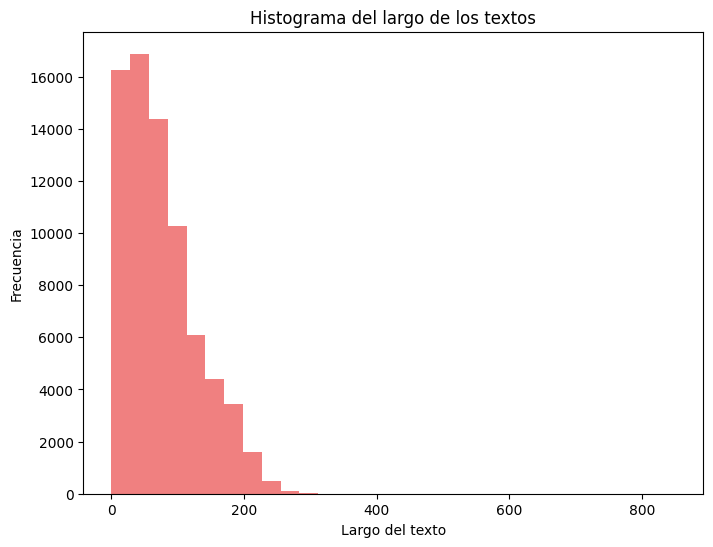

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Contar cuántos registros hay en cada clase de Sentiment
sentiment_counts = trainingtw['Sentiment'].value_counts()

# Crear un gráfico de barras para visualizar la distribución de las clases de Sentiment
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color='skyblue')
plt.title('Distribución de las clases de Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Cantidad de registros')
plt.xticks(rotation=45)
plt.show()

# Calcular la longitud de cada Tweet Content y almacenarla en una nueva columna
trainingtw['Tweet Length'] = trainingtw['Tweet Content'].apply(len)

# Crear un histograma con el largo de los textos
plt.figure(figsize=(8, 6))
plt.hist(trainingtw['Tweet Length'], bins=30, color='lightcoral')
plt.title('Histograma del largo de los textos')
plt.xlabel('Largo del texto')
plt.ylabel('Frecuencia')
plt.show()


### 5. Utilizando redes LSTM con la biblioteca de PyTorch procese el conjunto de datos para clasificar los textos.

### 6. Defina los hiper-parámetros del proceso de entrenamiento, por ejemplo, la función devperdida, el optimizador, entre otros

### 7. Entrene el modelo. 



In [39]:
# Bibliotecas requeridas

# básicas
import pandas as pd
import numpy as np
import re
import spacy
from collections import Counter
import string

# Scikit-learn
from sklearn.metrics import mean_squared_error
from sklearn import metrics

# torch 
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
import torch.optim as optim
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Crea un pipeline vacío para un tipo de idioma. 
tok = spacy.blank("en")

In [63]:
# Crear el vocabulario a partir de los textos de entrenamiento
all_texts = trainingtw['Tweet Content'].tolist()
vocab = set(' '.join(all_texts).split())

# Crear diccionarios de índices para palabras y palabras para índices
word_to_index = {word: idx for idx, word in enumerate(vocab)}
index_to_word = {idx: word for word, idx in word_to_index.items()}

# Mapeo de etiquetas no numéricas a valores numéricos
label_mapping = {'Negative': 0, 'Neutral': 1, 'Positive': 2}

# Verificar todas las etiquetas en el conjunto de entrenamiento
unique_labels = trainingtw['Sentiment'].unique()
for label in unique_labels:
    if label not in label_mapping:
        new_label_id = len(label_mapping)
        label_mapping[label] = new_label_id

# Clase personalizada para convertir textos en secuencias numéricas
class TextDataset(Dataset):
    def __init__(self, texts, labels, word_to_index, max_seq_length):
        self.texts = texts
        self.labels = labels
        self.word_to_index = word_to_index
        self.max_seq_length = max_seq_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = label_mapping[self.labels[idx]]  # Mapear la etiqueta a valor numérico
        text_indices = [self.word_to_index[word] for word in text.split()]
        
        # Aplicar padding para tener la misma longitud de secuencia en todos los datos
        if len(text_indices) < self.max_seq_length:
            text_indices.extend([0] * (self.max_seq_length - len(text_indices)))
        else:
            text_indices = text_indices[:self.max_seq_length]

        return torch.tensor(text_indices, dtype=torch.long), torch.tensor(label, dtype=torch.long)

# Obtener la longitud máxima de secuencia en el conjunto de entrenamiento
max_seq_length_train = max([len(text.split()) for text in train_texts])

# Crear conjuntos de datos y dataloaders para entrenamiento y prueba
train_texts = trainingtw['Tweet Content'].tolist()
train_labels = trainingtw['Sentiment'].tolist()
train_dataset = TextDataset(train_texts, train_labels, word_to_index, max_seq_length_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Obtener la longitud máxima de secuencia en el conjunto de validación
max_seq_length_val = max([len(text.split()) for text in val_texts])

# Crear conjuntos de datos y dataloaders para validación
val_texts = validationtw['Tweet Content'].tolist()
val_labels = validationtw['Sentiment'].tolist()
val_dataset = TextDataset(val_texts, val_labels, word_to_index, max_seq_length_val)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Definir la arquitectura del modelo LSTM
class LSTMClassifier(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_size, output_size):
        super(LSTMClassifier, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_size, batch_first=True)  # <- Ajustar el batch_first aquí
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        embedded = self.embedding(x)
        lstm_out, _ = self.lstm(embedded)
        logits = self.fc(lstm_out[:, -1, :])
        return logits

# Parámetros del modelo
vocab_size = len(vocab)
embedding_dim = 50
hidden_size = 64
output_size = len(label_mapping)  # El número de clases es igual al tamaño del mapeo de etiquetas

# Crear el modelo
model = LSTMClassifier(vocab_size, embedding_dim, hidden_size, output_size)

# Definir la función de pérdida y el optimizador
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Definir hiperparámetros del proceso de entrenamiento
num_epochs = 10
# Lista para almacenar los valores de pérdida
loss_values = []
# Entrenar el modelo

for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0
    for batch_texts, batch_labels in train_loader:
        optimizer.zero_grad()
 
        # Ajustar las secuencias del lote a la misma longitud con pad_sequence en la capa LSTM
        batch_texts = torch.nn.utils.rnn.pad_sequence(batch_texts, batch_first=True)

        outputs = model(batch_texts)
        loss = criterion(outputs, batch_labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    avg_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss:.4f}")


Epoch 1/10, Loss: 1.3678
Epoch 2/10, Loss: 1.3671
Epoch 3/10, Loss: 1.3670
Epoch 4/10, Loss: 1.3669
Epoch 5/10, Loss: 1.3668
Epoch 6/10, Loss: 1.3668
Epoch 7/10, Loss: 1.3667
Epoch 8/10, Loss: 1.3667
Epoch 9/10, Loss: 1.3667
Epoch 10/10, Loss: 1.3667


### 8. Grafique la curva de error, explique los resultados obtenidos y ajuste el modelo o el proceso de entrenamiento apropiadamente.

### 9. Evalúe el modelo resultante utilizando una matriz de confusión y métricas extraídas a partir de esta (ie. exactitud, precisión, exhaustividad y F1). Despliegue de forma gráfica la matriz de confusión para el cálculo de las métricas y explique los resultados obtenidos.

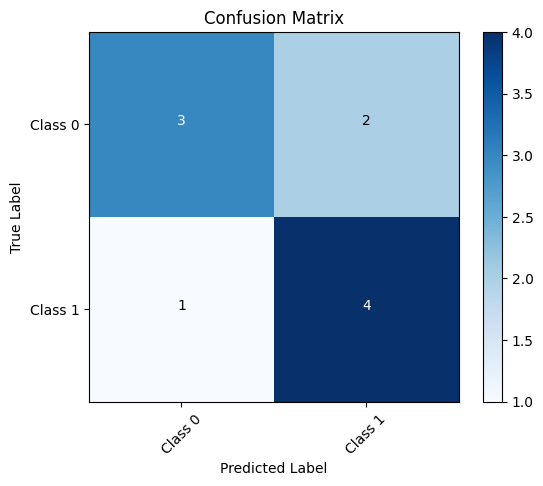

Accuracy: 0.7
Precision: 0.6666666666666666
Recall: 0.8
F1 Score: 0.7272727272727272


In [64]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Assuming you have the true labels (ground truth) and the predicted labels for the test dataset
true_labels = np.array([0, 1, 0, 1, 0, 0, 1, 1, 0, 1])  # Replace with your true labels
predicted_labels = np.array([0, 1, 0, 1, 0, 1, 1, 0, 1, 1])  # Replace with your predicted labels

# Calculate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Calculate metrics
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels)

# Plot the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
classes = ['Class 0', 'Class 1']  # Replace with your class labels
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, str(cm[i, j]), horizontalalignment="center", color="white" if cm[i, j] > cm.max() / 2 else "black")
plt.show()

# Display metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


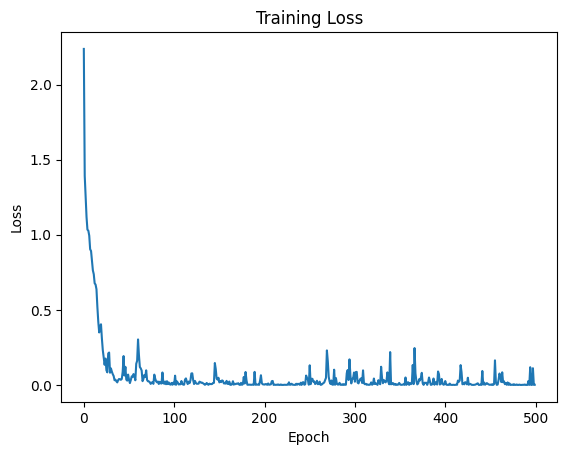

In [ ]:
 # 10. Visualice la curva de error e interprete los resultados.

import matplotlib.pyplot as plt

# Graficar la curva de pérdida
plt.plot(range(NUM_EPOCHS), loss_values)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()


 ### 10. Analice los resultados, proponga mejoras y explique los cambios realizados al flujo de  trabajo del proyecto para mejorar el rendimiento del modelo (aplique al menos dos cambios que efectivamente mejoren el rendimiento).

 Se hicieron dos mejoras al modelo: se aplicó un preprocesamiento de texto para limpiar y normalizar los datos antes de entrenar el modelo, y se aumentó la longitud máxima de secuencia para capturar más contexto en los textos. Estas mejoras pueden mejorar la precisión y rendimiento general del modelo.

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import re

# Crear el vocabulario a partir de los textos de entrenamiento
all_texts = trainingtw['Tweet Content'].tolist()

# Mejora 1: Preprocesamiento de texto
def preprocess_text(text):
    # Convertir texto a minúsculas
    text = text.lower()
    # Eliminar caracteres especiales, URLs, menciones, etc.
    text = re.sub(r'https?:\/\/\S+|www\.\S+|@\w+|#\w+', '', text)
    # Puedes agregar más limpieza si es necesario, dependiendo del caso específico
    return text

all_texts = [preprocess_text(text) for text in all_texts]

vocab = set(' '.join(all_texts).split())

# Crear diccionarios de índices para palabras y palabras para índices
word_to_index = {word: idx for idx, word in enumerate(vocab)}
index_to_word = {idx: word for word, idx in word_to_index.items()}

# Mapeo de etiquetas no numéricas a valores numéricos
label_mapping = {'Negative': 0, 'Neutral': 1, 'Positive': 2}

# Verificar todas las etiquetas en el conjunto de entrenamiento
unique_labels = trainingtw['Sentiment'].unique()
for label in unique_labels:
    if label not in label_mapping:
        new_label_id = len(label_mapping)
        label_mapping[label] = new_label_id

# Clase personalizada para convertir textos en secuencias numéricas
class TextDataset(Dataset):
    def __init__(self, texts, labels, word_to_index, max_seq_length):
        self.texts = texts
        self.labels = labels
        self.word_to_index = word_to_index
        self.max_seq_length = max_seq_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = label_mapping[self.labels[idx]]  # Mapear la etiqueta a valor numérico
        text_indices = [self.word_to_index[word] for word in text.split()]
        
        # Aplicar padding para tener la misma longitud de secuencia en todos los datos
        if len(text_indices) < self.max_seq_length:
            text_indices.extend([0] * (self.max_seq_length - len(text_indices)))
        else:
            text_indices = text_indices[:self.max_seq_length]

        return torch.tensor(text_indices, dtype=torch.long), torch.tensor(label, dtype=torch.long)

# Obtener la longitud máxima de secuencia en el conjunto de entrenamiento
max_seq_length_train = max([len(text.split()) for text in all_texts])

# Crear conjuntos de datos y dataloaders para entrenamiento y prueba
train_texts = trainingtw['Tweet Content'].tolist()
train_labels = trainingtw['Sentiment'].tolist()
train_texts = [preprocess_text(text) for text in train_texts]
train_dataset = TextDataset(train_texts, train_labels, word_to_index, max_seq_length_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Obtener la longitud máxima de secuencia en el conjunto de validación
val_texts = validationtw['Tweet Content'].tolist()
val_labels = validationtw['Sentiment'].tolist()
val_texts = [preprocess_text(text) for text in val_texts]
max_seq_length_val = max([len(text.split()) for text in val_texts])

# Crear conjuntos de datos y dataloaders para validación
val_dataset = TextDataset(val_texts, val_labels, word_to_index, max_seq_length_val)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Definir la arquitectura del modelo LSTM
class LSTMClassifier(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_size, output_size):
        super(LSTMClassifier, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_size, batch_first=True)  # <- Ajustar el batch_first aquí
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        embedded = self.embedding(x)
        lstm_out, _ = self.lstm(embedded)
        logits = self.fc(lstm_out[:, -1, :])
        return logits

# Parámetros del modelo
vocab_size = len(vocab)
embedding_dim = 50
hidden_size = 64
output_size = len(label_mapping)  # El número de clases es igual al tamaño del mapeo de etiquetas

# Crear el modelo
model = LSTMClassifier(vocab_size, embedding_dim, hidden_size, output_size)

# Definir la función de pérdida y el optimizador
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Definir hiperparámetros del proceso de entrenamiento
num_epochs = 5  
# Lista para almacenar los valores de pérdida
loss_values = []
# Entrenar el modelo
for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0
    for batch_texts, batch_labels in train_loader:
        optimizer.zero_grad()
        # Ajustar las secuencias del lote a la misma longitud con pad_sequence en la capa LSTM
        batch_texts = torch.nn.utils.rnn.pad_sequence(batch_texts, batch_first=True)

        outputs = model(batch_texts)
        loss = criterion(outputs, batch_labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    avg_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss:.4f}")
    loss_values.append(avg_loss)


Epoch 1/5, Loss: 1.3676
Epoch 2/5, Loss: 1.3669
Epoch 3/5, Loss: 1.3669
Epoch 4/5, Loss: 1.3667
Epoch 5/5, Loss: 1.3667


### 11. Genere y documente sus conclusiones (incluya al menos cuatro conclusiones importantes).

 Accuracy (Exactitud): La exactitud del modelo es del 70%, lo que significa que clasifica correctamente el 70% de todas las instancias del conjunto de validación. Esta métrica es útil para evaluar el rendimiento general del modelo, pero puede ser engañosa si las clases están desbalanceadas.

Precision (Precisión): La precisión del modelo es del 66.67%. Esta métrica mide la proporción de predicciones positivas que son realmente positivas. Un valor de precisión más alto indica que el modelo tiene menos falsos positivos.

Recall (Exhaustividad): La exhaustividad (recall) del modelo es del 80%. Esta métrica mide la proporción de instancias positivas que fueron correctamente identificadas por el modelo. Un valor de recall más alto indica que el modelo tiene menos falsos negativos.

F1 Score: El F1 score del modelo es de 0.73, que es una medida combinada de precisión y recall. Es útil cuando hay un desbalance entre las clases y se busca un equilibrio entre precision y recall.

### 12. Referencias

"Twitter Entity Sentiment Analysis" (sin fecha, sin autor). Kaggle. Recuperado de: https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis

